In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [2]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-u4psos02
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-u4psos02
  Resolved https://github.com/pydata/xarray.git to commit c25215299c02cd36781cf3aa38e8583d1fe14849
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev1+gc2521529-py3-none-any.whl size=1247984 sha256=b6934fbe5b503eae8a06629020b18152c058ff9b6e827ac714392b43775fcd46
  Stored in directory: /tmp/pip-ephem-wheel-cache-xsmy9543/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.1
    Uninstalling xarray-2025.1.1:
      Successfully uninstalled xarray-2025.1.1


In [2]:
import xarray as xr

In [3]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.2 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb

# Introduction
As a basketball player I always try to improve the way I play the game. One way I can always get better is by avoiding turning the ball over. Turnovers in basketball are the worst because they waste a posession that could have ended in a score. In this project I wanted to see if I could find the best predictors to use and the best bambi model I could make for turnovers of nba players.

In [5]:
bball = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv')

In [6]:
bball

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


# Predictors
At first I just used my knowledge about basketball to come up with the best predictors. Position is an obvious one, certain positions touch the ball more frequently meaning that they would have a higher chance of turning the ball over. Field Goal Attempts (FGA), Assists (AST), and Points (PTS) follows the same logic, the more you touch the ball the higher the chance of turning the ball over.

In [7]:
bball = bball.query('MP>99')
bball = bball[['Player', 'Pos', 'MP', 'FGA', 'AST', 'TOV', 'PTS']]
bball

,Player,Pos,MP,FGA,AST,TOV,PTS
0,Precious Achiuwa,PF-C,1624,469,97,83,565
1,Bam Adebayo,C,2416,1017,278,162,1367
2,Ochai Agbaji,SG,1641,433,83,64,455
3,Santi Aldama,PF,1618,568,138,69,654
4,Nickeil Alexander-Walker,SG,1921,538,204,76,655
...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,439,108,57,15,137
568,Trae Young,PG,1942,1008,583,235,1389
569,Omer Yurtseven,C,545,184,29,37,222
570,Cody Zeller,C,320,62,39,16,76


In [ ]:
model1TOV = bmb.Model("`TOV` ~ `FGA` + Pos", data=bball)
idata_model1TOV = model1TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FGA', ylabel='TOV'>], dtype=object))

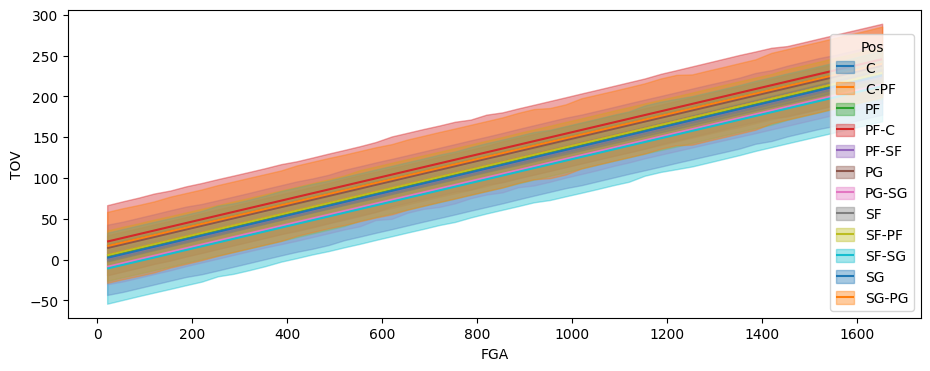

In [ ]:
bmb.interpret.plot_predictions(model1TOV,
                               idata_model1TOV,
                                ["FGA",  "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
model2TOV = bmb.Model("`TOV` ~ `PTS` + Pos", data=bball)
idata_model2TOV = model2TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='PTS', ylabel='TOV'>], dtype=object))

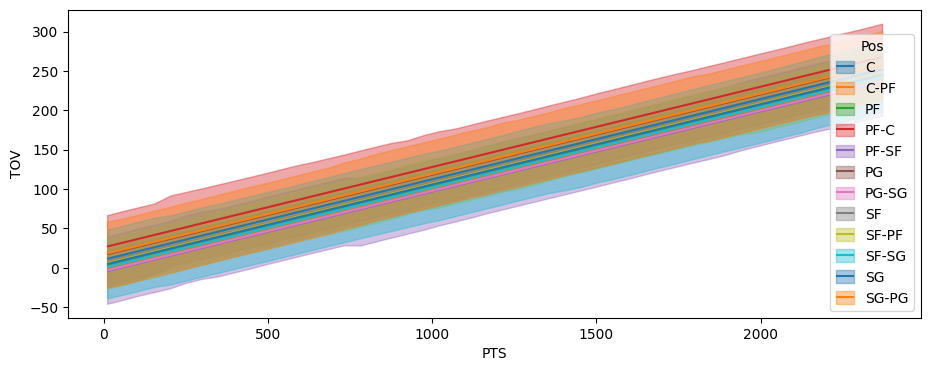

In [ ]:
bmb.interpret.plot_predictions(model2TOV,
                               idata_model2TOV,
                                ["PTS", "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
model3TOV = bmb.Model("`TOV` ~ `AST` + Pos", data=bball)
idata_model3TOV = model3TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='AST', ylabel='TOV'>], dtype=object))

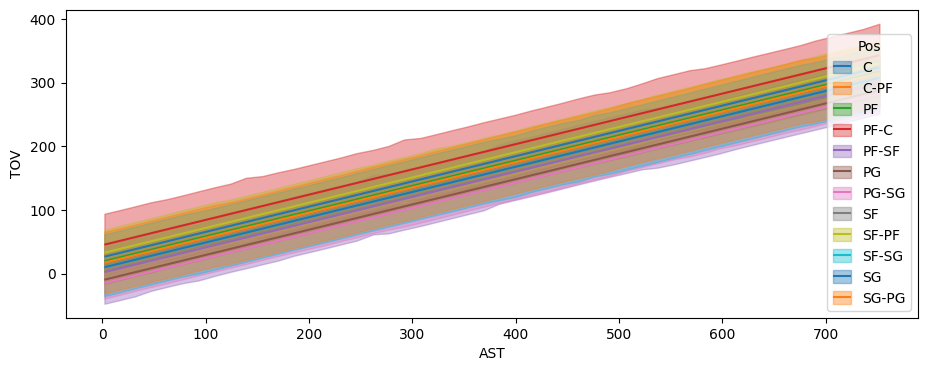

In [ ]:
bmb.interpret.plot_predictions(model3TOV,
                               idata_model3TOV,
                                ["AST", "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
model4TOV = bmb.Model("`TOV` ~ `FGA` + `AST`", data=bball)
idata_model4TOV = model4TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FGA', ylabel='TOV'>], dtype=object))

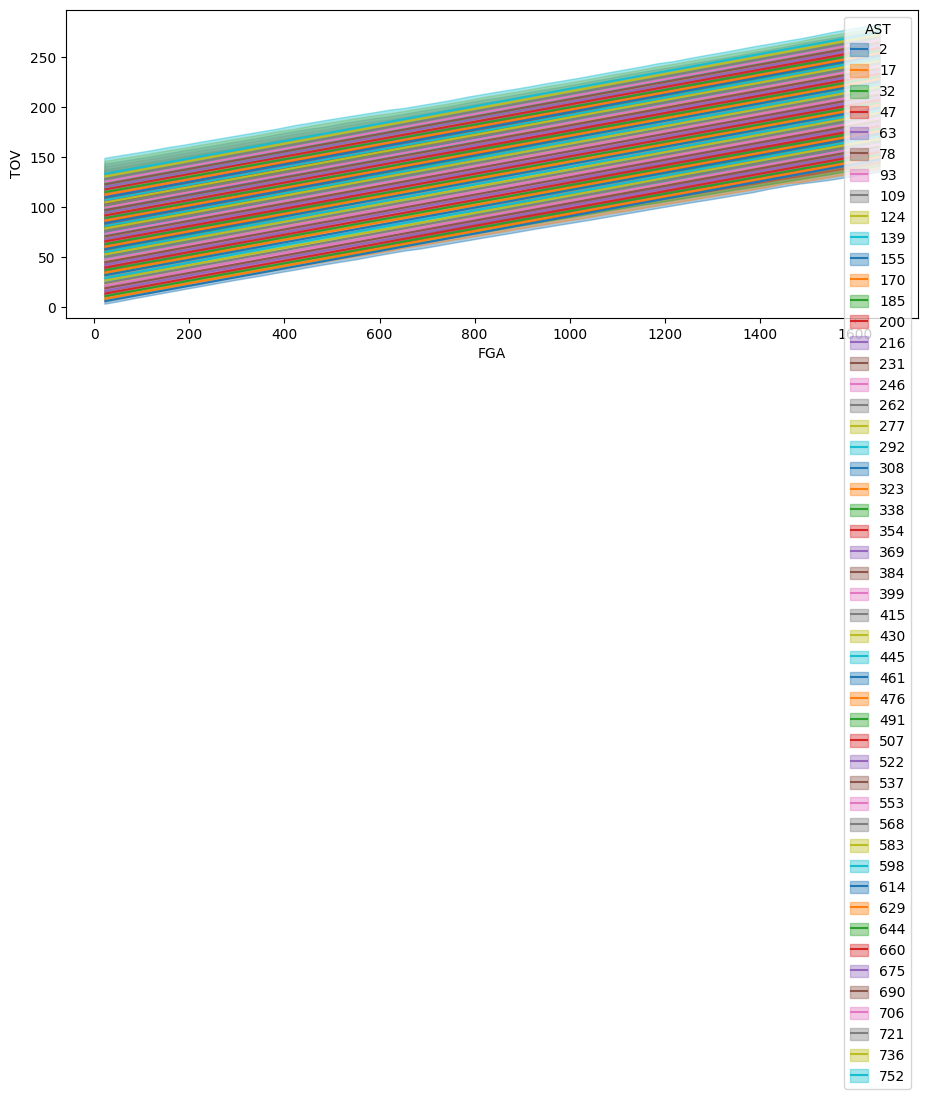

In [ ]:
bmb.interpret.plot_predictions(model4TOV,
                               idata_model4TOV,
                                ["FGA", "AST"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
model5TOV = bmb.Model("`TOV` ~ `FGA` * `PTS` + Pos", data=bball)
idata_model5TOV = model5TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FGA', ylabel='TOV'>], dtype=object))

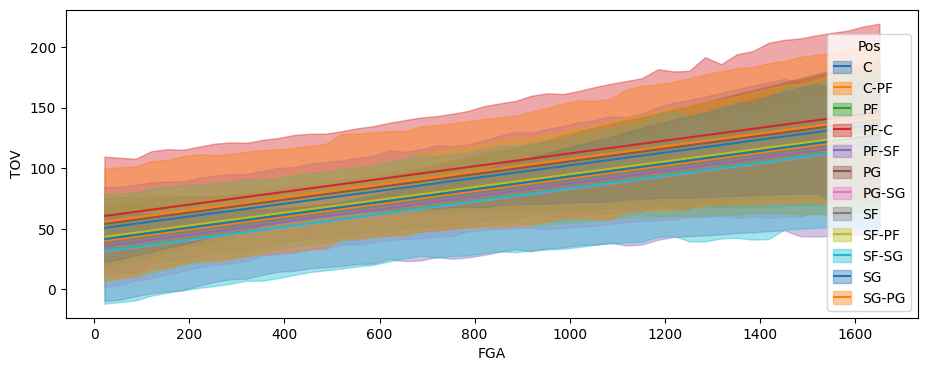

In [ ]:
bmb.interpret.plot_predictions(model5TOV,
                               idata_model5TOV,
                                ["FGA", "Pos"], fig_kwargs={"figsize":(11, 4)})

In [11]:
model6TOV = bmb.Model("`TOV` ~ `FGA` * `PTS` + `AST` + Pos", data=bball)
idata_model6TOV = model6TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 12 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = C-PF'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FGA', ylabel='TOV'>],
        [<Axes: title={'center': 'Pos = PF-C'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = PF-SF'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FGA', ylabel='TOV'>],
        [<Axes: title={'center': 'Pos = PG-SG'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = SF'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = SF-PF'}, xlabel='FGA', ylabel='TOV'>],
        [<Axes: title={'center': 'Pos = SF-SG'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = SG-PG'}, xlabel='FGA', ylabel='TOV'>]],
       dtype=object))

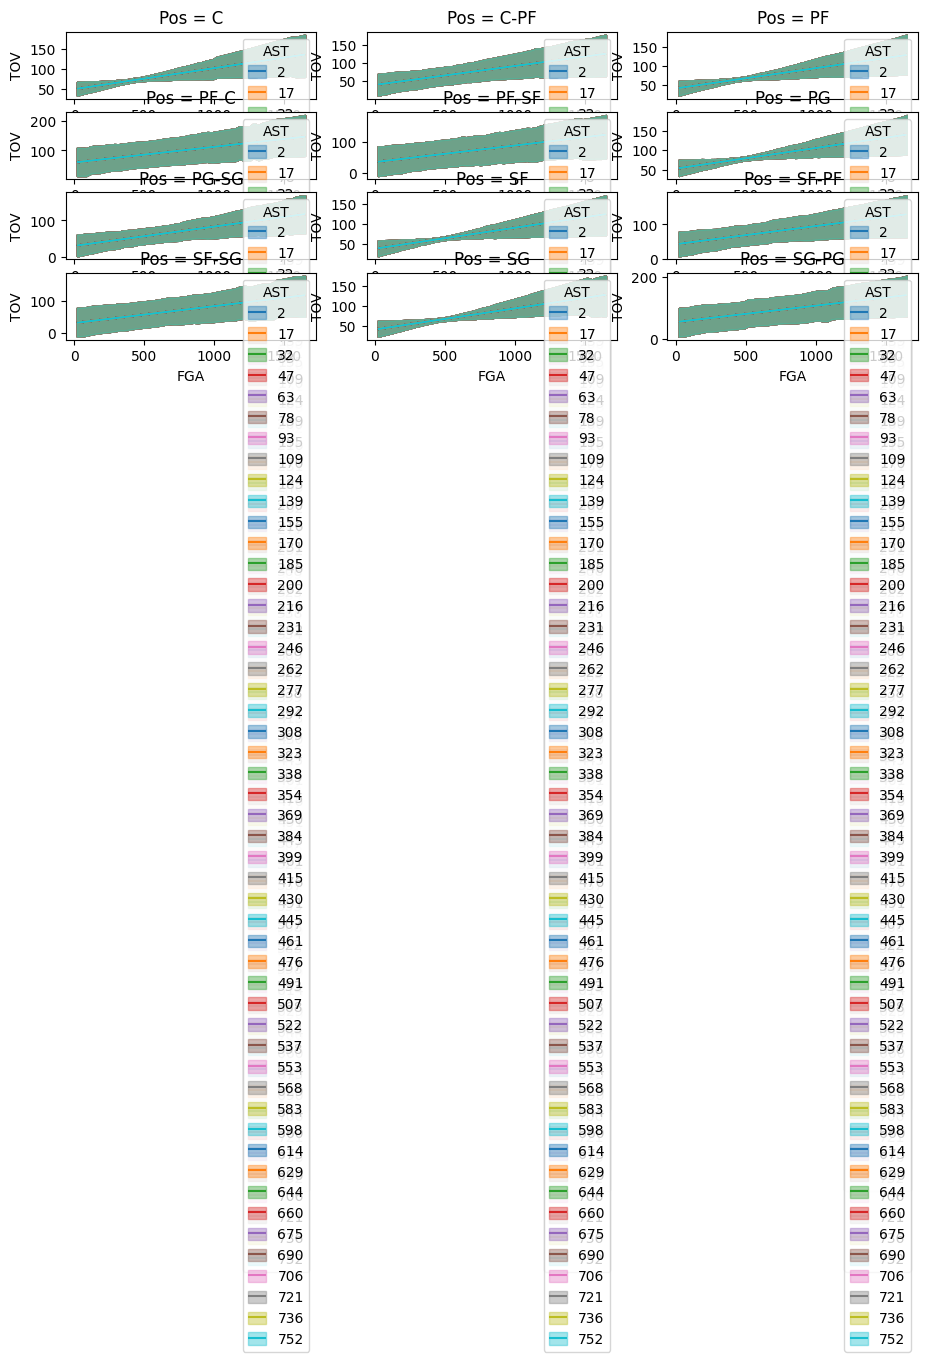

In [ ]:
bmb.interpret.plot_predictions(model6TOV,
                               idata_model6TOV,
                                ["FGA", "AST", "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
model7TOV = bmb.Model("`TOV` ~ `FGA` * `PTS` * `AST` + Pos", data=bball)
idata_model7TOV = model7TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 12 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = C-PF'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FGA', ylabel='TOV'>],
        [<Axes: title={'center': 'Pos = PF-C'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = PF-SF'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FGA', ylabel='TOV'>],
        [<Axes: title={'center': 'Pos = PG-SG'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = SF'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = SF-PF'}, xlabel='FGA', ylabel='TOV'>],
        [<Axes: title={'center': 'Pos = SF-SG'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FGA', ylabel='TOV'>,
         <Axes: title={'center': 'Pos = SG-PG'}, xlabel='FGA', ylabel='TOV'>]],
       dtype=object))

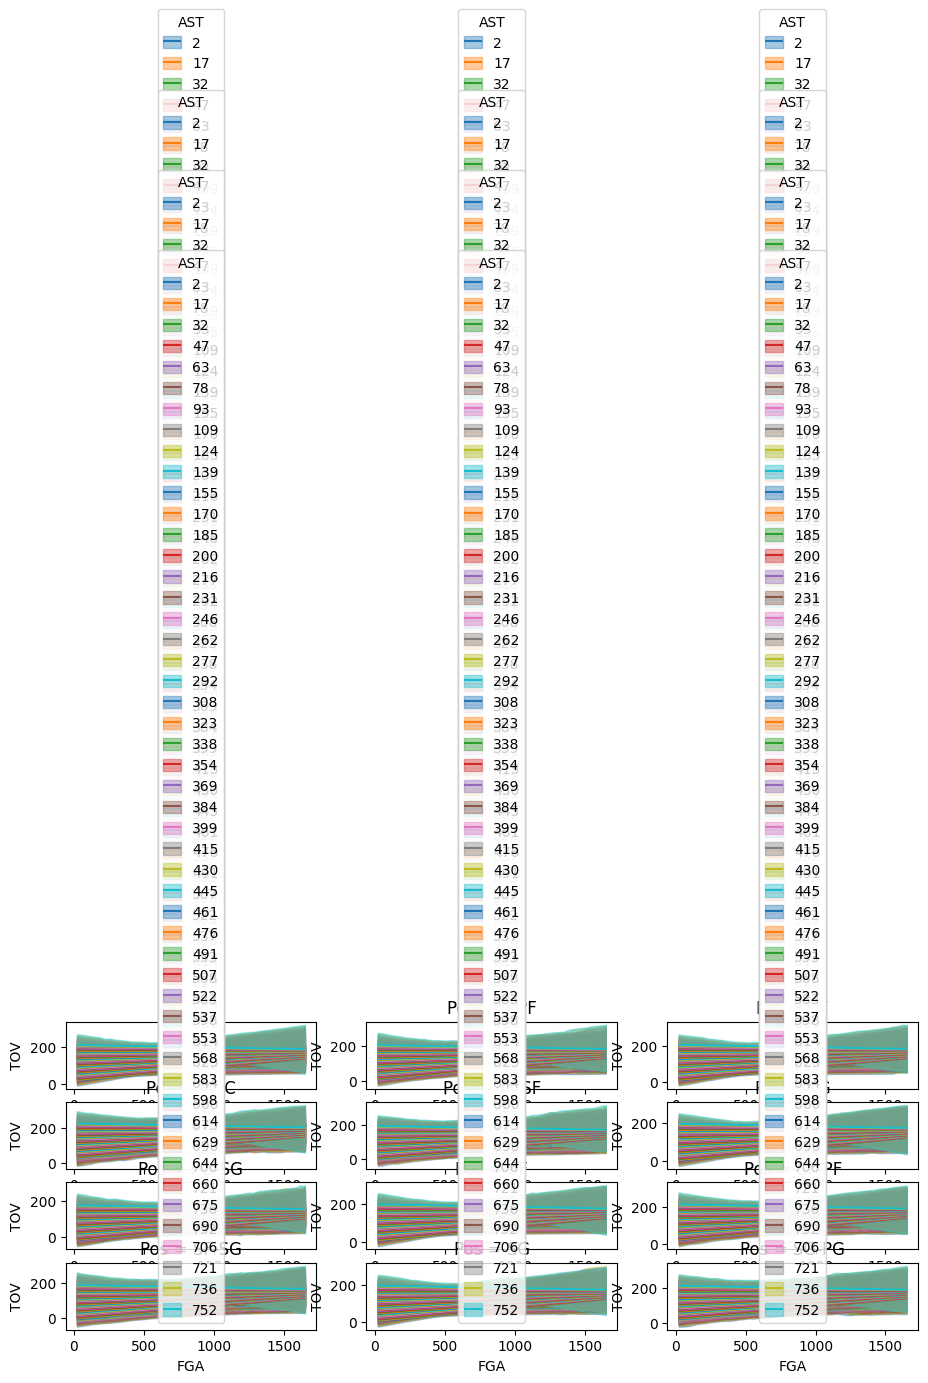

In [ ]:
bmb.interpret.plot_predictions(model7TOV,
                               idata_model7TOV,
                                ["FGA", "AST", "Pos"], fig_kwargs={"figsize":(11, 4)})

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

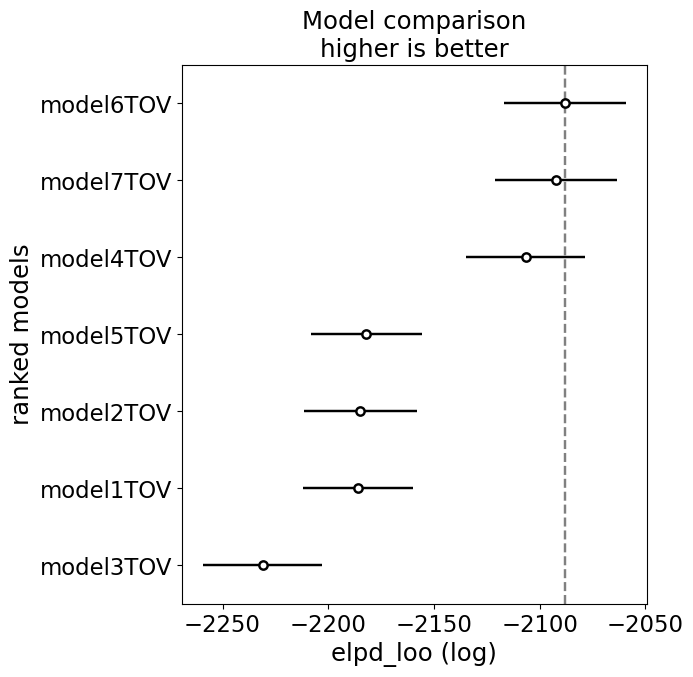

In [ ]:
compare = az.compare({"model1TOV":idata_model1TOV, "model2TOV":idata_model2TOV, "model3TOV":idata_model3TOV, "model4TOV":idata_model4TOV, "model5TOV":idata_model5TOV, "model6TOV":idata_model6TOV, "model7TOV":idata_model7TOV})
az.plot_compare(compare)

# 1st Group of Models
With this group of bambi models my model 6 was the best one. That model combined all of the predictors that I wanted to use and had an interaction between FGA and PTS. However, the elpd_loo score was still in the negatives for all my models. I went back and looked at my data and I noticed that I set a minimum of 100 minutes played for the players that were in my dataset and I realized that I missed a predictor. If I used MP as one of my predictors I could get a more accurate prediction, so I wanted to try model 6 again with MP added as a predictor.

In [8]:
model8TOV = bmb.Model("`TOV` ~ `FGA` * `PTS` + `AST` + `MP` + Pos", data=bball)
idata_model8TOV = model8TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [9]:
model9TOV = bmb.Model("`TOV` ~ `FGA` * `PTS` + `AST` * `MP` + Pos", data=bball)
idata_model9TOV = model9TOV.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

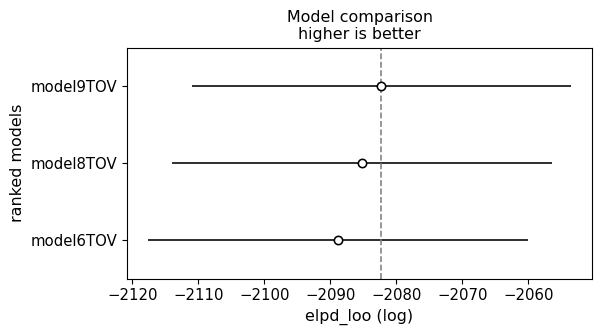

In [12]:
compare = az.compare({"model6TOV":idata_model6TOV, "model8TOV":idata_model8TOV, "model9TOV":idata_model9TOV})
az.plot_compare(compare)

# Conclusion
Using MP was obviously a pretty good for my model and it makes logical sense too. The more minutes a player plays the higher the chance they commit a turnover. So in the end my best bambi model was the one that used all my predictors with an interaction between FGA and PTS and an interaction between AST and MP. This model could be useful at predicting the number of turnovers a player will have, but I don't think it would be useful for finding out how to limit turnovers, because all it is doing is using a players other stats and essentially finding out how much they have the ball in their hands to predict how many turnovers they have. Using my model the way to have less turnovers is to have the ball less, which isn't super useful.

# New Section

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU6proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU6proj.ipynb"

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generilized linear model structure built with pymc and/or bambi. Your data must have more than three potential predictor variables. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is).
  - You must document and explain your model selection method. This means you must show that your likelihood/link function combo is better than at least one other choice of likelihood/link function.
  - You must document and explain your variable selection method. This means you must show that your final model is better than at least one other version of the model with a different selection of variables.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

In [ ]:
import bambi as bmb

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated hierearchical glm. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit6NotesAK *is* your example! Specifically, try to do something akin to using more of the columns in the basketball data to predict FG%. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.
